# C - δ13C relationship in Southwest Indian Ridge
### Hyun Joo Lee
https://mybinder.org/v2/gh/pangeo-data/pangeo-docker-images/2021.09.30?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fhyun-joo-lee%252FFinal-Project%26urlpath%3Dtree%252FFinal-Project%252FFinal-project.ipynb%26branch%3Dmain

The volcanoes around the world are emitting CO2 and the mantle is considered as massive carbon reservoir of the Earth. The carbon content from the volcanoes varies with the region (i.e. mid-ocean ridge, arc, and hotspot), however, the source below them, which is mainly upper mantle, do not varies with the region. The variation would be contributed by the processes from the source of magma to the eruption. There are numerous variables constrain the carbon content and isotope, I will focus on how the pressure affects on the carbon in the case of South West Indian Ridge (SWIR).

# Load data

I used the data from Cartigny (2001) paper. Mid-ocean ridge basalt near the SWIR has been dredged and their carbon concentration, CO2 gas in the vesicle, and C isotope in the vesicle were analyzed.

In [1]:
import pooch
doi = "doi:10.5281/zenodo.5758254"
fname = "Cartigny(2001)Volatile (C, N, Ar) variability in MORB and the respective roles of mantle source heterogeneity and degassing the case of the Southwest Indian Ridge.csv"
file_path = pooch.retrieve(
    url=f"{doi}/{fname}",
    known_hash="md5:709475d51f4813406d629664b03b60f5",
)
file_path

'/home/jovyan/.cache/pooch/aac3b69c93f321d253657b72105a8d70-Cartigny(2001)Volatile (C, N, Ar) variability in MORB and the respective roles of mantle source heterogeneity and degassing the case of the Southwest Indian Ridge.csv'

In [2]:
import pandas as pd
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Weight,Longitude,Latitude,Depth,ppm C,N2,δ15N,CO2,δ13C,δ18O,N2/Ar,C/N2,C/Ar,Type
0,NaN,(g),(°S),(°E),(m),NaN,(nmol),(‰ vs. air),(μmol),(‰ vs. PDB),(‰ vs. SMOW),NaN,NaN,NaN,NaN
1,RTJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RTJ-JC 2-17-D1,2.2136,70.02,25.58,5 000,n.d.,4.8,−1.0,3.2,−6.42,11.1,75.0,665,49 890,N
3,MD 23 Site 4,1.9317,70.32,25.68,4 150,n.d.,20.1,−2.3,10.5,−5.62,11.72,142.0,523,74 477,N
4,SWIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Clean the data

In [3]:
df = df.drop([14])
df = df.drop([0])

In [4]:
df['Latitude'] = df['Latitude'].astype(float)
df['Latitude'] = df['Latitude']*(-1)
df=df.replace('n.d.', 'NaN')
df=df.replace('NaN', 'NaN')
df['CO2'] = df['CO2'].astype(float)
df['ppm C'] = df['ppm C'].astype(float)
df['δ13C']=df['δ13C'].str.replace('−', '-').astype(float)
df['Depth']=df['Depth'].str.replace(' ', '').astype(float)

In [5]:
df['Region']=['RTJ','RTJ','RTJ',
              'SWIR','SWIR','SWIR','SWIR','SWIR','SWIR','SWIR','SWIR','SWIR','SWIR','SWIR','SWIR','SWIR','SWIR','SWIR','SWIR','SWIR','SWIR','SWIR','SWIR',
              'MFJ','MFJ','MFJ','MFJ','MFJ','MFJ','MFJ','MFJ','MFJ','MFJ','MFJ','MFJ','MFJ','MFJ','MFJ','MFJ',
              'CIR','CIR','CIR','CIR',
              'SEIR','SEIR']
df.loc[12,'Longitude']=df.loc[11,'Longitude']
df.loc[13,'Longitude']=df.loc[11,'Longitude']
df.loc[12,'Latitude']=df.loc[11,'Latitude']
df.loc[13,'Latitude']=df.loc[11,'Latitude']
df.loc[12,'Depth']=df.loc[11,'Depth']
df.loc[13,'Depth']=df.loc[11,'Depth']

df.head()

,Unnamed: 0,Weight,Longitude,Latitude,Depth,ppm C,N2,δ15N,CO2,δ13C,δ18O,N2/Ar,C/N2,C/Ar,Type,Region
1,RTJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RTJ
2,RTJ-JC 2-17-D1,2.2136,70.02,-25.58,5000.0,NaN,4.8,−1.0,3.2,-6.42,11.1,75.0,665,49 890,N,RTJ
3,MD 23 Site 4,1.9317,70.32,-25.68,4150.0,NaN,20.1,−2.3,10.5,-5.62,11.72,142.0,523,74 477,N,RTJ
4,SWIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SWIR
5,EDUL DR 1-1-7,1.3175,68.73,-26.09,4850.0,96.0,6.7,−2.4,5.5,-5.58,10.09,88.0,818,71 650,N,SWIR


# Part 1: C - δ13C variation with region
The carbon concentration and isotope values will be plotted on the map along the ridge to see the variaiton in the ridge scale and check the source is homogeneous.

In [6]:
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.patches as mpatches

/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


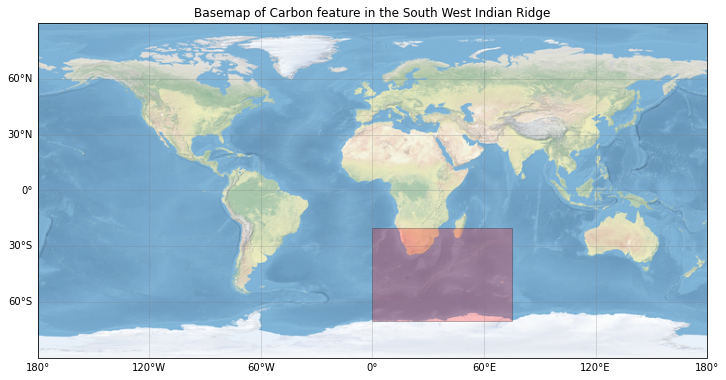

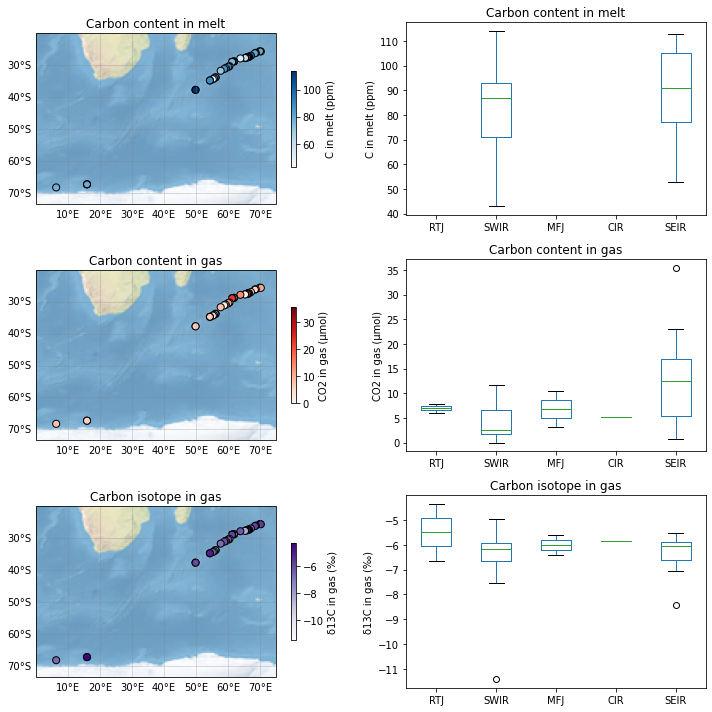

In [7]:
extent=[0, 75, -70, -20]

# Basemap
fig0 = plt.figure(figsize=(12,12))
ax0 = fig0.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
ax0.stock_img()
ax0.add_patch(mpatches.Rectangle(xy=[0, -70], width=75, height=50,
                                    facecolor='red',
                                    edgecolor='k',
                                    alpha=0.25,
                                    transform=ccrs.PlateCarree()))
g0=ax0.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
g0.xlabels_top=False
g0.ylabels_right=False
ax0.set_title('Basemap of Carbon feature in the South West Indian Ridge')

# Values on the map
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(321, projection=ccrs.PlateCarree())
ax1.set_extent(extent)
ax1.stock_img()
ax1.set_title('Carbon content in melt')
g1=ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
g1.xlabels_top=False
g1.ylabels_right=False
splot1= ax1.scatter(df.Longitude, df.Latitude, c = df['ppm C'], cmap='Blues', edgecolor='k', s=50, transform=ccrs.PlateCarree())
plt.colorbar(splot1, shrink=0.5, label='C in melt (ppm)')

ax2 = fig1.add_subplot(323, projection=ccrs.PlateCarree())
ax2.set_extent(extent)
ax2.stock_img()
ax2.set_title('Carbon content in gas')
g2=ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
g2.xlabels_top=False
g2.ylabels_right=False
splot2=ax2.scatter(df.Longitude, df.Latitude, c = df['CO2'], cmap='Reds', edgecolor='k', s=50, transform=ccrs.PlateCarree())
plt.colorbar(splot2, shrink=0.5, label='CO2 in gas (μmol)')

ax3 = fig1.add_subplot(325, projection=ccrs.PlateCarree())
ax3.set_extent(extent)
ax3.stock_img()
ax3.set_title('Carbon isotope in gas')
g3=ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
g3.xlabels_top=False
g3.ylabels_right=False
splot3=ax3.scatter(df.Longitude, df.Latitude, c = df['δ13C'], cmap='Purples', edgecolor='k', s=50, transform=ccrs.PlateCarree())
plt.colorbar(splot3, shrink=0.5, label='δ13C in gas (‰)')

# Groupby region
ax4 = fig1.add_subplot(322)
splot4= df.groupby('Region').boxplot(column='ppm C', subplots=False, ax=ax4)
ax4.set_ylabel('C in melt (ppm)')
ax4.set_title('Carbon content in melt')
ax4.grid(False)
ax4.set_xticklabels(df.Region.unique())

ax5 = fig1.add_subplot(324)
splot5 = df.groupby('Region').boxplot(column='CO2', subplots=False, ax=ax5)
ax5.set_ylabel('CO2 in gas (μmol)')
ax5.set_title('Carbon content in gas')
ax5.grid(False)
ax5.set_xticklabels(df.Region.unique())

ax6 = fig1.add_subplot(326)
splot6 = df.groupby('Region').boxplot(column='δ13C', subplots=False, ax=ax6)
ax6.set_ylabel('δ13C in gas (‰)')
ax6.set_title('Carbon isotope in gas')
ax6.grid(False)
ax6.set_xticklabels(df.Region.unique())

plt.tight_layout();

#### Part 1-Result
There is no regional difference in carbon in melt and gas, and carbon isotope of the gas, which means C-δ13C at the magma source might be homogeneous.

# Part 2: C solubility with pressure
Carbon solubility in the basalt is proportionally increasing with the pressure. The depth versus and carbon concentration will be plotted to see solubility depends on the pressure. 

## Linear Regression

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

df_reg1 = df.dropna(subset=['CO2'])
X1 = df_reg1[["CO2"]]
Y1 = df_reg1[["Depth"]]
regressor1 = LinearRegression()
regressor1.fit(X1, Y1)
Y1_pred = regressor1.predict(X1)

df_reg2 = df.dropna(subset=['ppm C']).loc[df['ppm C']!='NaN']
X2 = df_reg2[["ppm C"]]
Y2 = df_reg2[["Depth"]]
regressor2 = LinearRegression()
regressor2.fit(X2, Y2)
Y2_pred = regressor2.predict(X2)

In [9]:
# Convert depth to pressure
mbsl=np.arange(2500,5600,100)
pressure=1025*9.8*mbsl/100000

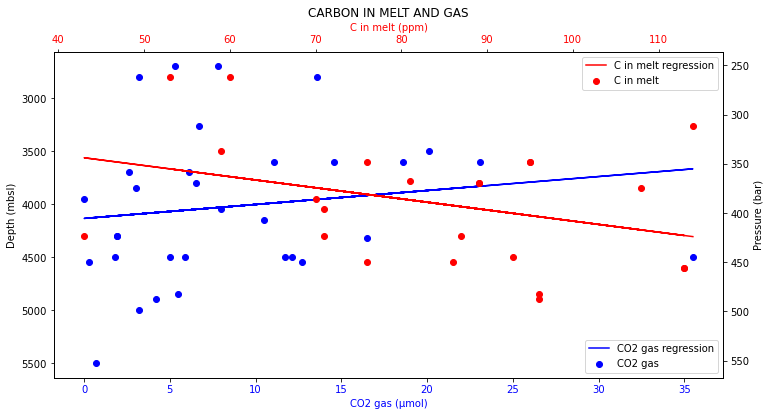

In [10]:
# Depth vs C in melt and in gas
fig, ax1 = plt.subplots(figsize = (12,6))
ax1.set_xlabel('CO2 gas (μmol)', color='Blue')
ax1.set_ylabel('Depth (mbsl)')
ax1.scatter(df['CO2'], df['Depth'], color='Blue')
ax1.tick_params(axis='x', labelcolor='Blue')
ax1.plot(X1, Y1_pred, color='Blue')

ax2 = ax1.twiny()
ax2.set_xlabel('C in melt (ppm)', color='Red')
ax2.scatter(df['ppm C'], df['Depth'], color='Red')
ax2.tick_params(axis='x', labelcolor='Red')
ax2.plot(X2, Y2_pred, color='Red')

plt.gca().invert_yaxis()
ax1.set_title('CARBON IN MELT AND GAS')
ax1.legend(('CO2 gas regression', 'CO2 gas'), loc = 'lower right')
ax2.legend(('C in melt regression', 'C in melt'), loc = 'upper right')


ax3 = ax1.twinx()
ax3.plot(np.transpose(pressure), alpha=0)
ax3.set_ylabel('Pressure (bar)')
plt.gca().invert_yaxis();

#### Part 2-1-Result
Even if they shows poor relationship with depth, there are trends, which shows CO2 in gas decreasing while C in melt increasing with depth. This result means pressure dependant solubility feature is also effective in this pressure range. Also, Exsolved gas is conserved in the vesicle proportional to exsoluted amount, which helps to calculate source carbon content. However, the poor relationship leaves the possibility that they quenched at below the seafloor or other processes controlling the solubility of carbon in addition to pressure.

#### Part 2-2
C in melt vs in gas plot can simply show their negative correlation.

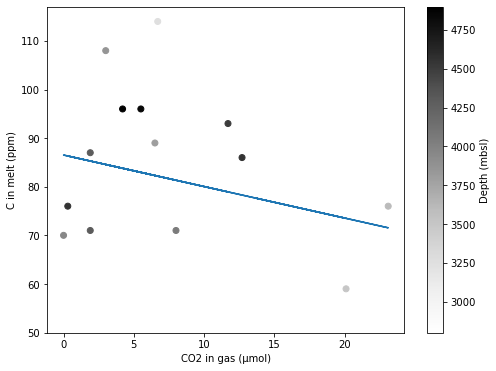

In [11]:
# C in melt vs C in gas
df_reg3 = df.dropna(subset=['CO2'])
df_reg3 = df_reg3.dropna(subset=['ppm C']).loc[df['ppm C']!='NaN']
X3 = df_reg3[["CO2"]]
Y3 = df_reg3[["ppm C"]]
regressor3 = LinearRegression()
regressor3.fit(X3, Y3)
Y3_pred = regressor3.predict(X3)

fig, ax = plt.subplots(figsize=(8,6))
fig=ax.scatter(df['CO2'], df['ppm C'], c=df['Depth'], cmap='Greys')
plt.colorbar(fig, label='Depth (mbsl)')
ax.plot(X3, Y3_pred)
ax.set_xlabel('CO2 in gas (μmol)')
ax.set_ylabel('C in melt (ppm)');

# Part 3: δ13C variability
The carbon content versus isotope will be plotted to see the carbon isotope varies with the amount of CO2 and pressure.

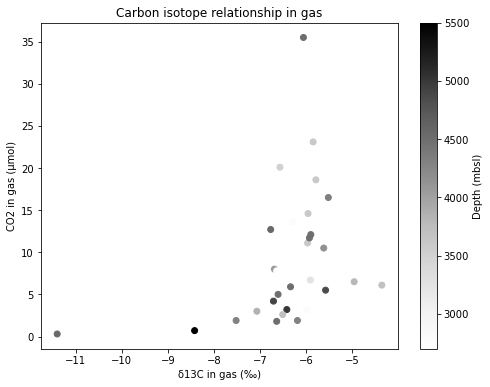

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
fig=ax.scatter(df['δ13C'], df['CO2'], c=df['Depth'], cmap='Greys')
ax.set_xlabel('δ13C in gas (‰)')
ax.set_ylabel('CO2 in gas (μmol)')
ax.set_title('Carbon isotope relationship in gas')
plt.colorbar(fig, label='Depth (mbsl)');

#### Part 3-Result 
It is known that carbon isotope does not vary with the pressure. The result shows that carbon isotope does not show variation in this pressure range.

# Future works
- Other region: other ridges, hotspot, OIB, etc.
- Experiment: to make sure carbon isotope does not vary with wide range of pressure
- Study on tother processes controlling solubility and isotope fraftionation beside pressure (e.g. species, water...)